In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
import seaborn as sns

# Set up read of csv file
netflix_path = "netflix_template.csv"

netflix_info = pd.read_csv(netflix_path)

# testing to ensure csv was read
netflix_info.head()

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...


In [45]:
netflix_info_df = netflix_info.copy()


In [46]:
netflix_info_df

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,Czech Republic,United Kingdom,2020.0,2005,TV-MA,99 min,Dramas,International Movies,NaN,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,NaN,NaN,2019.0,2015,TV-14,111 min,Dramas,International Movies,Music & Musicals,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,NaN,NaN,2020.0,2019,TV-MA,44 min,Documentaries,International Movies,Music & Musicals,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,NaN,NaN,2020.0,2019,TV-PG,1 Season,International TV Shows,Reality TV,NaN,Dessert wizard Adriano Zumbo looks for the nex...


In [47]:
netflix_info_df.columns






Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'country.1',
       'country.2', 'YEAR_added', 'release_year', 'rating', 'duration',
       'TYPE1/listed_in', 'TYPE2', 'TYPE3', 'description'],
      dtype='object')

In [48]:
feature = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'YEAR_added', 'release_year', 'rating', 'duration',
       'TYPE1/listed_in', 'description']

In [49]:
list(enumerate(feature))

[(0, 'show_id'),
 (1, 'type'),
 (2, 'title'),
 (3, 'director'),
 (4, 'cast'),
 (5, 'country'),
 (6, 'YEAR_added'),
 (7, 'release_year'),
 (8, 'rating'),
 (9, 'duration'),
 (10, 'TYPE1/listed_in'),
 (11, 'description')]

In [50]:
#plt.figure(figsize = (15, 30))
#for i in enumerate(feature):
   # plt.subplot(4, 3, i[0]+1)
 #   sns.countplot(i[1], hue = 'x', data = netflix_info_df )
  #  plt.xticks(rotation = 45)

In [63]:
netflix_info_countries = netflix_info['country'].value_counts()

netflix_info_countries

United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
                  ... 
Iran                 1
Somalia              1
Senegal              1
Mauritius            1
Belarus              1
Name: country, Length: 81, dtype: int64

In [64]:
netflix_info_countries_df = pd.DataFrame(netflix_info_countries)
Twenty_countries = netflix_info_countries_df.head(20)

In [61]:
#variables for visuals
#genre = netflix_info_df['TYPE1/listed_in'].count()
#Country = netflix_info_df['country'].count()
#Rating = netflix_info_df['rating']
#MovieOrTV = netflix_info_df['type']
#Show_id = netflix_info_df['show_id']
#Duration = netflix_info_df['duration']
#Year = netflix_info_df['YEAR_added']

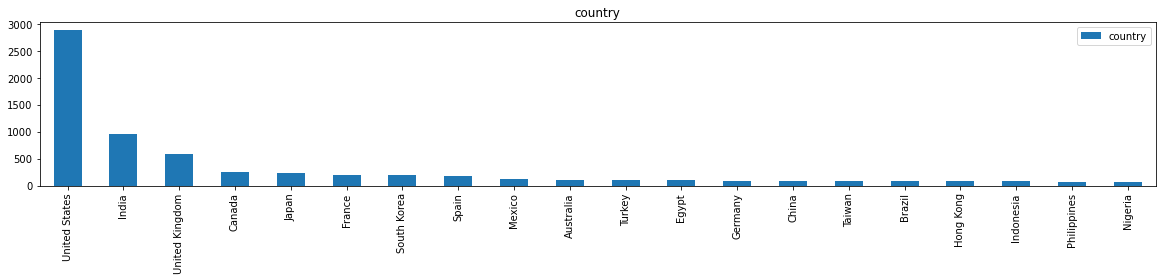

<Figure size 432x288 with 0 Axes>

In [65]:
Twenty_countries.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title('country')

plt.show()
plt.tight_layout()          

In [ ]:
# Importing the matplotlib library
#import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 10])
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(['USA', 'Brazil', 'Russia', 'Spain', 'UK'], [2026493, 710887, 476658, 288797, 287399], label = "Danger zone", color = 'r')
plt.barh(['India', 'Italy', 'Peru', 'Germany', 'Iran'], [265928, 235278, 199696, 186205, 173832], label = "Not safe zone", color = 'g')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Total cases')
plt.ylabel('Countries')
# Giving the tilte for the plot
plt.title('Top ten countries most affected by\n coronavirus')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

In [60]:
netflix_info = netflix_info_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = netflix_info, order=netflix_info.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('title')
plt.ylabel('TYPE1/listed_in')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'listed_in'

In [ ]:
order = netflix_df.rating.unique()
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()

In [68]:
netflix_countries = netflix_info.loc[netflix_info["country"]=="United States"]
netflix_country_usa_df = pd.DataFrame(netflix_countries)
netflix_country_usa_df.count()

show_id            2883
type               2883
title              2883
director           2088
cast               2550
country            2883
country.1           327
country.2            90
YEAR_added         2841
release_year       2883
rating             2880
duration           2883
TYPE1/listed_in    2883
TYPE2              1680
TYPE3               574
description        2883
dtype: int64

In [69]:
#find overall count of countries 
netflix_info_countries = netflix_info['country'].value_counts()

netflix_info_countries

United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
                  ... 
Iran                 1
Somalia              1
Senegal              1
Mauritius            1
Belarus              1
Name: country, Length: 81, dtype: int64

In [70]:
netflix_info_countries_df = pd.DataFrame(netflix_info_countries)
Twenty_countries = netflix_info_countries_df.head(20)

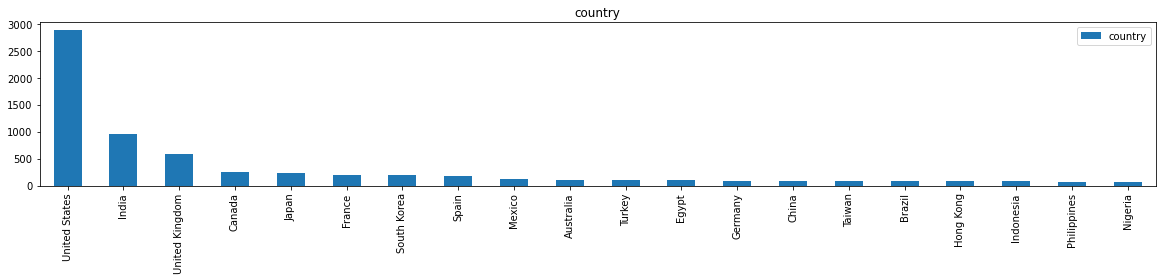

<Figure size 432x288 with 0 Axes>

In [71]:
Twenty_countries.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title('country')

plt.show()
plt.tight_layout()   

In [72]:
netflix_genres = netflix_info.loc[netflix_info["TYPE1/listed_in"]=="Dramas"]
netflix_Genres_df = pd.DataFrame(netflix_genres)
netflix_Genres_df.count()

show_id            1384
type               1384
title              1384
director           1373
cast               1378
country            1353
country.1           288
country.2           118
YEAR_added         1384
release_year       1384
rating             1383
duration           1384
TYPE1/listed_in    1384
TYPE2              1267
TYPE3               694
description        1384
dtype: int64

In [73]:
netflix_info_Genres = netflix_info['TYPE1/listed_in'].value_counts()
netflix_info_Genres 

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
C

In [76]:
netflix_info_Genres_df = pd.DataFrame(netflix_info_Genres)
fifteen_genres = netflix_info_Genres_df.head(20)


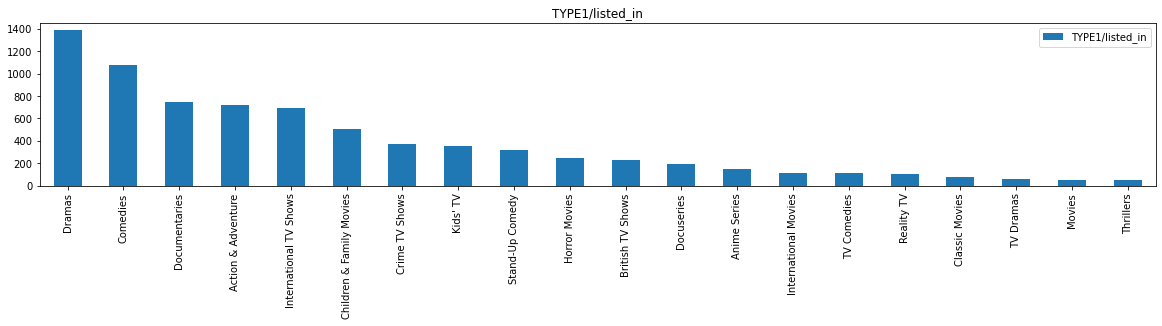

<Figure size 432x288 with 0 Axes>

In [77]:
fifteen_genres.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title('TYPE1/listed_in')

plt.show()
plt.tight_layout()  